In [500]:
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import sklearn

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import squarify

In [439]:
response=pd.read_csv('makemytrip_com-travel_sample.csv',encoding='ISO-8859-1',low_memory=False)


In [440]:
response.shape

(20062, 33)

In [441]:
response.describe()

,longitude,site_review_rating
count,20020.000000,554.000000
mean,59.342791,3.723105
std,32.893854,1.004352
min,0.000000,0.000000
25%,72.557652,3.400000
50%,75.852849,3.950000
75%,77.617111,4.300000
max,130.000000,5.000000


In [442]:
response.isnull().sum()

area                                5324
city                                   6
country                              471
crawl_date                          9356
highlight_value                     2379
hotel_overview                      3360
hotel_star_rating                     16
image_urls                         11460
in_your_room                        5368
is_value_plus                         20
latitude                              41
longitude                             42
mmt_holidayiq_review_count         10642
mmt_location_rating                 8521
mmt_review_count                   10680
mmt_review_rating                   8516
mmt_review_score                   10286
mmt_traveller_type_review_count     2052
mmt_tripadvisor_count               8899
pageurl                               19
property_address                      21
property_id                           19
property_name                         25
property_type                        136
qts             

In [443]:
response.drop(response.columns[[2,3,7,8,10,11,12,13,14,15,16,17,18,19,24,25,27,28,29,30,31,32]], axis=1, inplace=True)

In [444]:
response.shape

(20062, 11)

In [445]:
response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20062 entries, 0 to 20061
Data columns (total 11 columns):
area                 14738 non-null object
city                 20056 non-null object
highlight_value      17683 non-null object
hotel_overview       16702 non-null object
hotel_star_rating    20046 non-null object
is_value_plus        20042 non-null object
property_address     20041 non-null object
property_id          20043 non-null object
property_name        20037 non-null object
property_type        19926 non-null object
room_types           15162 non-null object
dtypes: object(11)
memory usage: 1.7+ MB


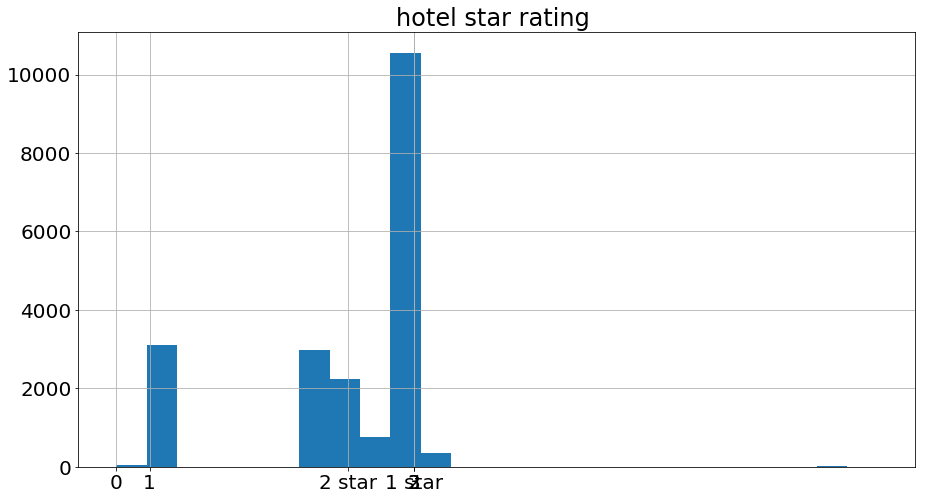

In [446]:
plt.subplots(figsize=(15,8))
response['hotel_star_rating'].hist(bins=25)
plt.xticks(list(range(0,6,1)))
plt.title('hotel star rating ')
plt.show() 

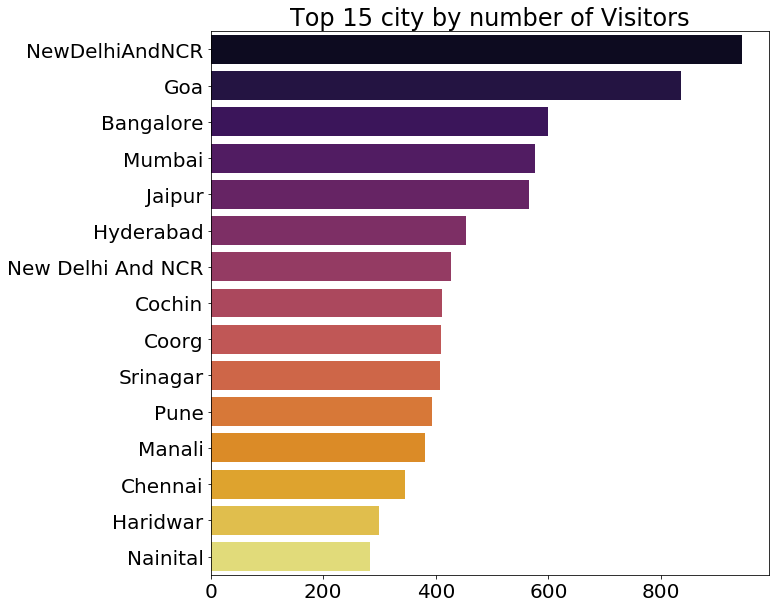

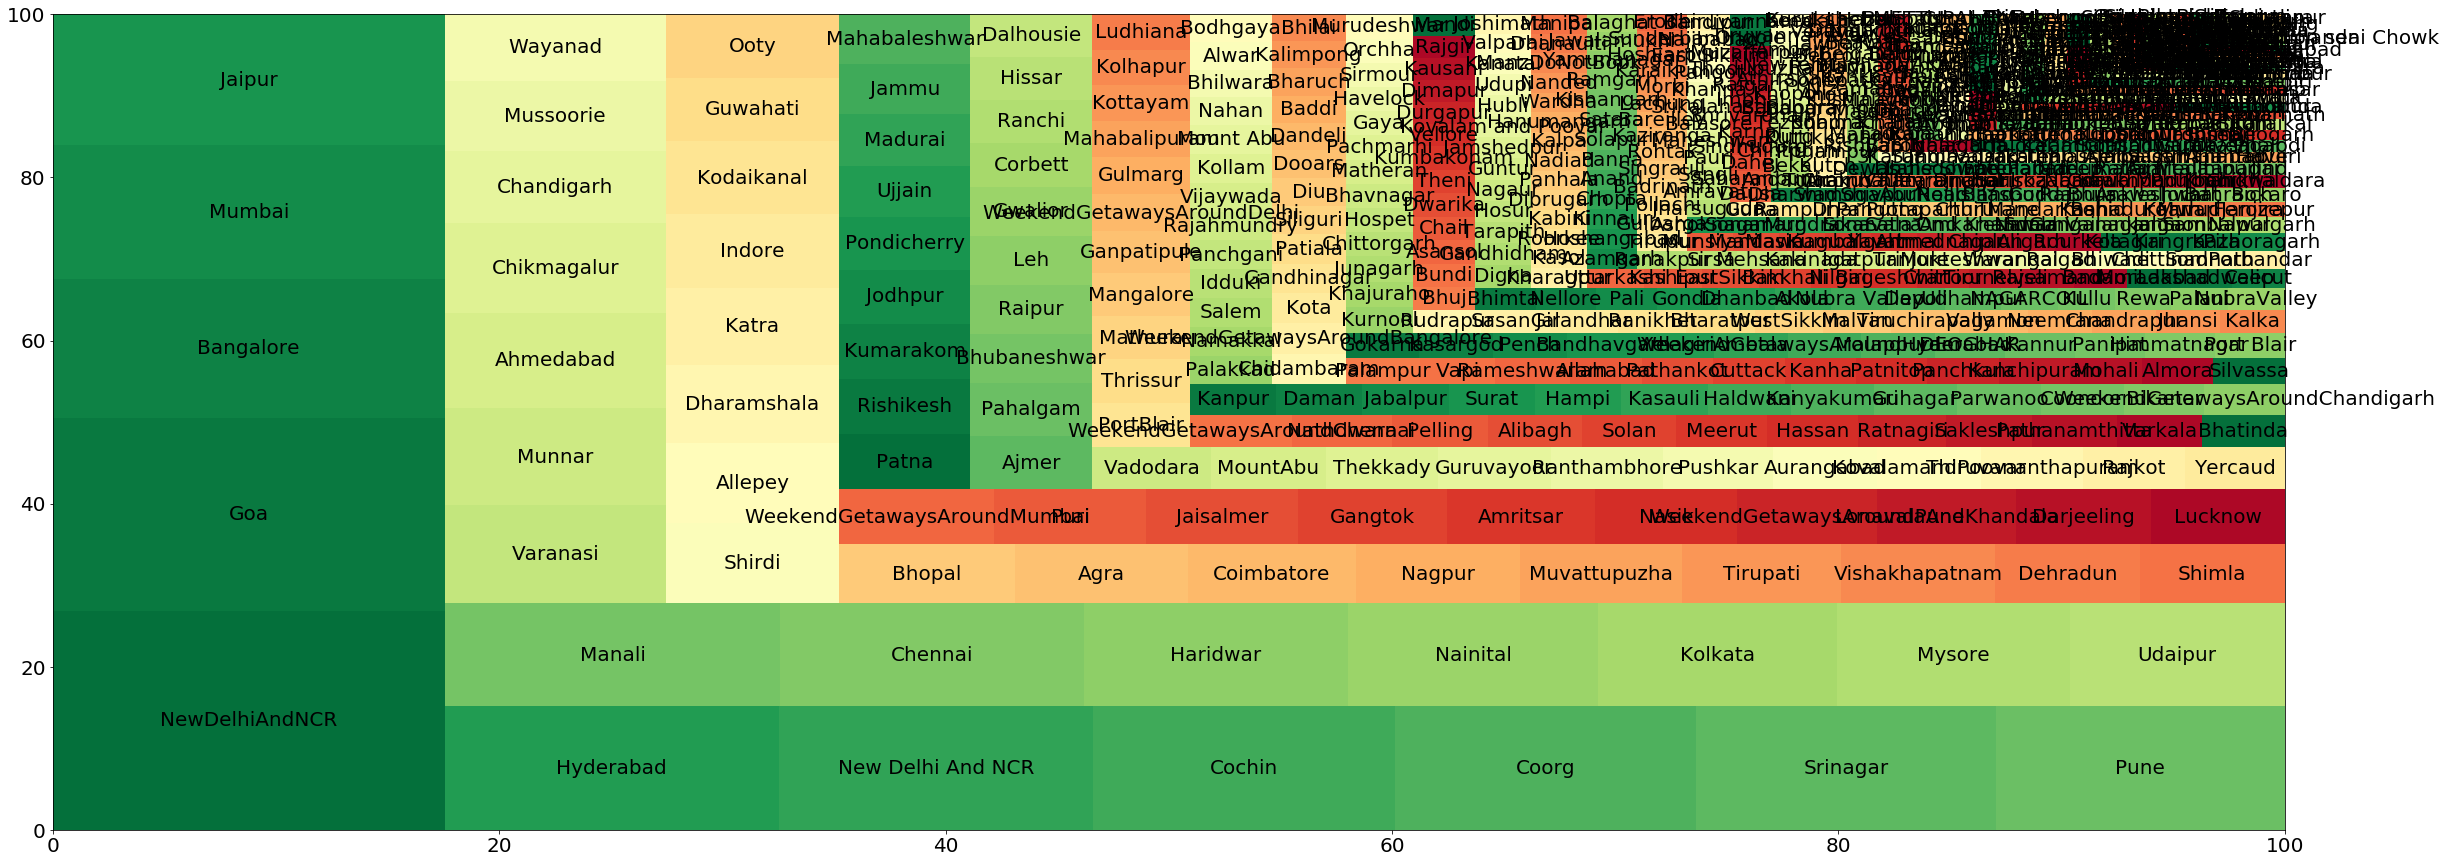

In [447]:
resp_coun=response['city'].value_counts()[:15].to_frame()
sns.barplot(resp_coun['city'],resp_coun.index,palette='inferno')
plt.title('Top 15 city by number of Visitors')
plt.xlabel('')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()
tree=response['city'].value_counts().to_frame()
squarify.plot(sizes=tree['city'].values,label=tree.index,color=sns.color_palette('RdYlGn_r',52))
plt.rcParams.update({'font.size':20})
fig=plt.gcf()
fig.set_size_inches(40,15)
plt.show()

In [448]:
response.isnull().sum()

area                 5324
city                    6
highlight_value      2379
hotel_overview       3360
hotel_star_rating      16
is_value_plus          20
property_address       21
property_id            19
property_name          25
property_type         136
room_types           4900
dtype: int64

In [449]:
response = response.dropna()
response.isnull().sum()

area                 0
city                 0
highlight_value      0
hotel_overview       0
hotel_star_rating    0
is_value_plus        0
property_address     0
property_id          0
property_name        0
property_type        0
room_types           0
dtype: int64

In [450]:
response.shape

(8502, 11)

In [451]:
response.duplicated(subset=['property_name']).sum()

2638

In [452]:
#response.drop_duplicates(subset=response.property_name, keep='first', inplace=False)
response = response.drop_duplicates(subset=['property_name'], keep='first', inplace=False)


In [453]:
response.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5864 entries, 3 to 20057
Data columns (total 11 columns):
area                 5864 non-null object
city                 5864 non-null object
highlight_value      5864 non-null object
hotel_overview       5864 non-null object
hotel_star_rating    5864 non-null object
is_value_plus        5864 non-null object
property_address     5864 non-null object
property_id          5864 non-null object
property_name        5864 non-null object
property_type        5864 non-null object
room_types           5864 non-null object
dtypes: object(11)
memory usage: 549.8+ KB


In [454]:
response

,area,city,highlight_value,hotel_overview,hotel_star_rating,is_value_plus,property_address,property_id,property_name,property_type,room_types
3,Dabok,Udaipur,Airport Transfer|Car rental|Conference Hall|Cu...,|SNP House Airport Hotel And Restaurant is loa...,1 star,no,"Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok",2.01407E+17,SNP House Airport Hotel And Restaurant,Hotel,`standard
26,C.V. Singh Colony,Jaisalmer,Airport Transfer|Doctor on Call|Guide Service|...,"Hotel Suman Palace is located in Jaisalmer, a ...",1,no,C.V.Singh Colony Opp Collector Office,2.01111E+17,Hotel Suman Palace,Hotel,Standard Non Ac
28,Mall Road,Manali,Front desk|Parking Facility|Wi-Fi Internet,"Nestled in the scenic grandeur, an amalgamatio...",2,no,"Adarsh Market, The Mall Manali",2.01512E+17,New Adarsh Annexe,Hotel,Deluxe
30,CVS Colony,Jaisalmer,Coffee Shop|Dining Hall|Doctor on Call|Guide S...,Hotel Ajanta Haveli in Jaisalmer is 35.5 km fr...,2,no,"CVS Colony, jaisalmer CVS Colony",2.0121E+17,Hotel Ajanta Haveli,Hotel,Deluxe Ac|Super Deluxe Ac
35,Jammu-Pathankot Highway NH-1A,Jammu,Activity centre|Air Conditioned|Airport Transf...,"23.6 km from Amar Mahal Museum, 21.6 km from B...",4,no,"NH A1, Vijaypur",2.01305E+17,Hotel 17 Miles,Hotel,Deluxe Room
37,Robinson,Palakkad,Conference Hall|Doctor on Call|Laundry Service...,Hotel Sayoojyam Residency is located in the he...,3,no,"Robinson Road, Palakkad Palakkad",2.01409E+17,Sayoojyam Residency,Hotel,Premium Room.|Executive Deluxe|Suite
38,Central avenue,Nagpur,Airport/Rlwy Stn Transfer|Conference Hall|Dini...,"Featuring a restaurant and multi-purpose hall,...",1,no,"51, Central Avenue Opp. Gitanjali Cinema",2.01107E+17,Hotel Woodlands,Hotel,Woods Deluxe|Woods Royal Deluxe|Woods Executiv...
40,Loghut Road,Manali,Doctor on Call|Free WiFi Internet|Gift/souveni...,"Snow Line, which just a 5 minutes' drive from ...",2,no,"CIRCUIT HOUSE, NEAR MALL ROAD Hadimba Road",2.00707E+17,Snow Line,Hotel,Deluxe|Luxury|Suite
42,Suryanelli,Munnar,Bonfire|Car rental|Children's Play Area|Hot an...,"7.1 km from Anayirankal Dam, 10.7 km from Kolu...",3,no,"Chinnakkanal, Munnar Chinnakanal, Munnar",2.00904E+17,Holiday Heaven,Hotel,Villa|Two Bedroom Villa
43,Ballygunge,Kolkata,Air Conditioned|Assistance with luggage on req...,The Samilton is situated in Kolkata. The prope...,3,no,"35A, Sarat Bose Road Bhawanipur,South Kolkata",2.00701E+17,The Samilton,Hotel,Standard|Superior Room


In [455]:
#clean hotel_star_rating column, remove 'star' from each data
response.hotel_star_rating= [x.strip('star') for x in response.hotel_star_rating]
#clean hotel_star_rating column, remove '' from each data
response.hotel_star_rating=[x.strip() for x in response.hotel_star_rating]

In [456]:
response.head()

,area,city,highlight_value,hotel_overview,hotel_star_rating,is_value_plus,property_address,property_id,property_name,property_type,room_types
3,Dabok,Udaipur,Airport Transfer|Car rental|Conference Hall|Cu...,|SNP House Airport Hotel And Restaurant is loa...,1,no,"Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok",2.01407E+17,SNP House Airport Hotel And Restaurant,Hotel,`standard
26,C.V. Singh Colony,Jaisalmer,Airport Transfer|Doctor on Call|Guide Service|...,"Hotel Suman Palace is located in Jaisalmer, a ...",1,no,C.V.Singh Colony Opp Collector Office,2.01111E+17,Hotel Suman Palace,Hotel,Standard Non Ac
28,Mall Road,Manali,Front desk|Parking Facility|Wi-Fi Internet,"Nestled in the scenic grandeur, an amalgamatio...",2,no,"Adarsh Market, The Mall Manali",2.01512E+17,New Adarsh Annexe,Hotel,Deluxe
30,CVS Colony,Jaisalmer,Coffee Shop|Dining Hall|Doctor on Call|Guide S...,Hotel Ajanta Haveli in Jaisalmer is 35.5 km fr...,2,no,"CVS Colony, jaisalmer CVS Colony",2.0121E+17,Hotel Ajanta Haveli,Hotel,Deluxe Ac|Super Deluxe Ac
35,Jammu-Pathankot Highway NH-1A,Jammu,Activity centre|Air Conditioned|Airport Transf...,"23.6 km from Amar Mahal Museum, 21.6 km from B...",4,no,"NH A1, Vijaypur",2.01305E+17,Hotel 17 Miles,Hotel,Deluxe Room


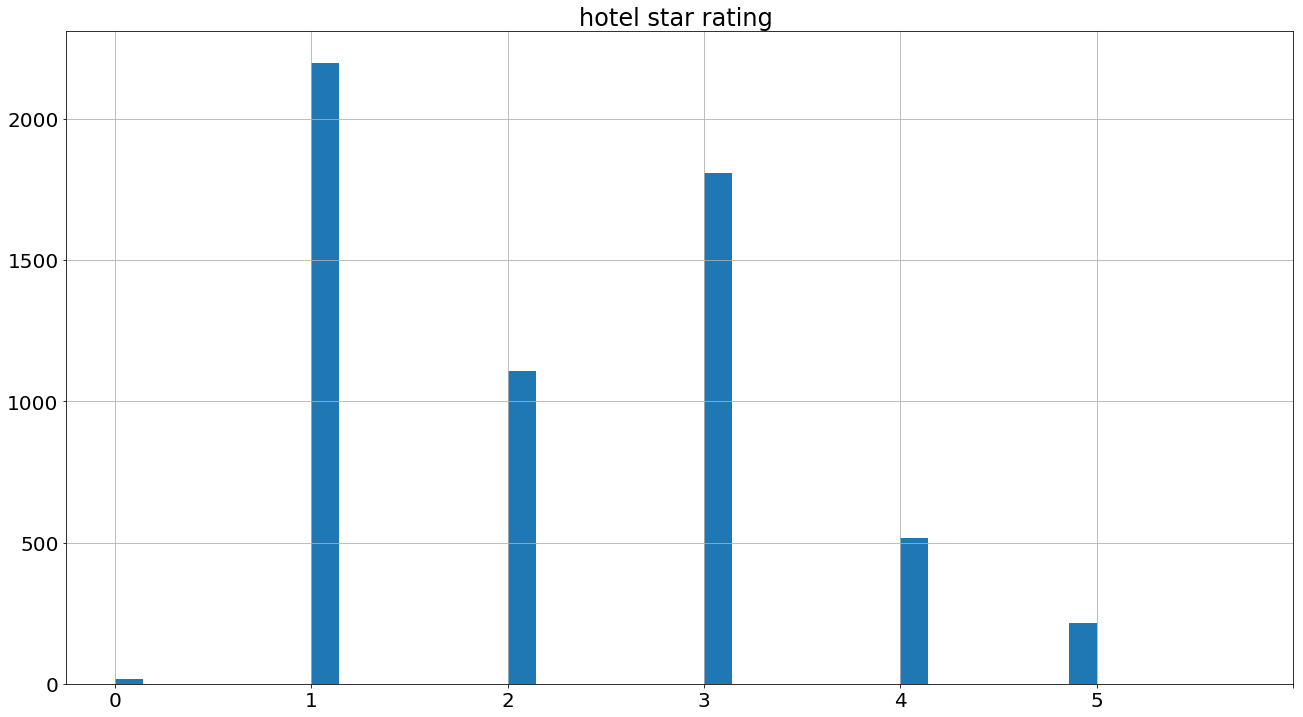

In [457]:
plt.subplots(figsize=(22,12))
response['hotel_star_rating'].hist(bins=35)
plt.xticks(list(range(0,7,1)))
plt.title('hotel star rating ')
plt.show() 

In [458]:
response.hotel_star_rating.unique()

array(['1', '2', '4', '3', '5', '0'], dtype=object)

In [459]:
pd.value_counts(response['hotel_star_rating'].values, sort=True)

1    2200
3    1810
2    1107
4     515
5     215
0      17
dtype: int64

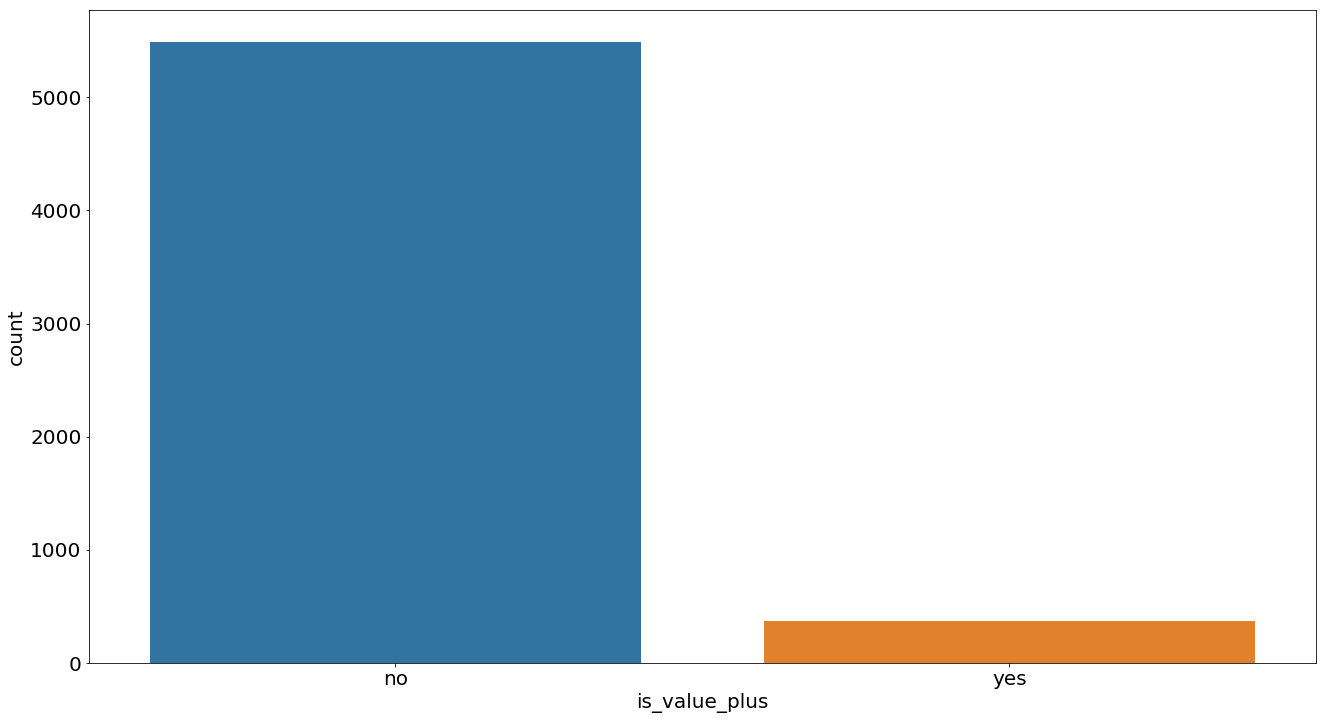

In [460]:
plt.subplots(figsize=(22,12))
sns.countplot(x=response['is_value_plus'],order=response['is_value_plus'].value_counts().index)
plt.show()

In [461]:
pd.value_counts(response['property_type'].values, sort=True)

Hotel          5761
Lodge            35
Resort           11
Apartment        10
Homestay         10
Houseboat         9
Guest House       9
Cottage           6
Camp              4
Villa             4
Beach Hut         3
Tree house        1
Palace            1
dtype: int64

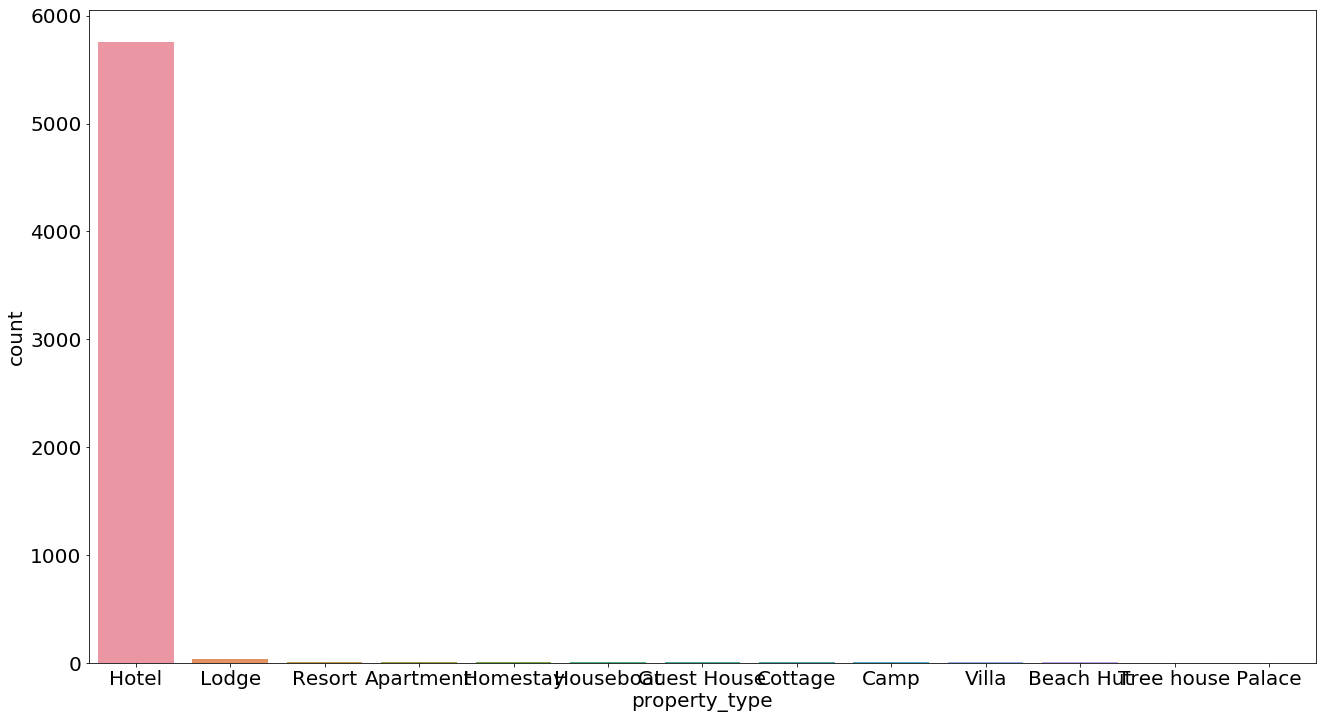

In [462]:
plt.subplots(figsize=(22,12))
sns.countplot(x=response['property_type'],order=response['property_type'].value_counts().index)
plt.show()

In [463]:
myList=[]
for text in response.room_types:
    words = text.split("|")
    for x in words:
        myList.append(x)
#print(List_room_types)
    

In [464]:
len(myList)

12241

In [465]:
Set_room_types = set(myList)
len(Set_room_types)
List_room_types = list(Set_room_types)
len(List_room_types)

3712

In [466]:
#pd.value_counts(response['property_name'].values, sort=True)

In [467]:
Set_property_name = set(response.property_name)
len(Set_property_name)
List_property_name = list(Set_property_name)
len(List_property_name)

5864

In [468]:
List_property_name

['Alpine Club',
 'Hotel Windsor Bay',
 'Villa Sunny Day',
 'Kanda Guest House',
 'The Lily',
 'Hotel Mamalla Inn',
 'Le Dupleix',
 'Hotel Sai Palace',
 'R K Residency',
 'Poppys AAR Royal Park',
 'CLUB 7 MALL AND HOTEL',
 'Hotel President',
 'Hotel Time Square',
 'Falcon Crest',
 "Gandhi's Paradise",
 'Pan Hill Hotel',
 'Dewa Hotel',
 'Jaipur Palace',
 'Hotel Scenaria',
 "Hotel Kb's Grand",
 'Dynasty Resorts Khurpatal',
 'Kasauli Hills Resorts(Formerly UNA',
 'Silver Oak',
 'Metrolink Dwarka Sector 12, New Delhi',
 'Hotel Harsh',
 'Hotel Picnic Country Club',
 'Hotel Airport Comfort',
 'Misty Mountain Resort',
 'Narain Niwas Palace Hotel',
 'Hotel Wall City',
 'Hotel City Star',
 'Hotel West End',
 'Zaffer Group of House Boats',
 'Shelter Beach Resorts',
 'Hotel Shyam Palace',
 'Mount Pleasant Guest House',
 'Hotel Poddar Regency',
 'Sunrise Inn',
 'JCT House Boat',
 'Hotel Saurabh Candy by Pepper Mint',
 'Sandy Resort',
 'Hotel Sunshine Karol Bagh',
 'Hotel Oriental Aster',
 'Radisson

In [469]:
response.iloc[[0]]

,area,city,highlight_value,hotel_overview,hotel_star_rating,is_value_plus,property_address,property_id,property_name,property_type,room_types
3,Dabok,Udaipur,Airport Transfer|Car rental|Conference Hall|Cu...,|SNP House Airport Hotel And Restaurant is loa...,1,no,"Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok",2.01407E+17,SNP House Airport Hotel And Restaurant,Hotel,`standard


In [470]:
df = pd.DataFrame(List_room_types)
df = df.transpose()
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df



,A/c Classic,Mandavdi Gom Cottage,Super Deluxe Ac Cottage,Lake View Villa,AC Deluxe Rooms,Grand Room,Royal.,3 BED STANDARD NON AC,Club Executive Superior,Group Suite,...,Ac Room 1,Hyatt Place Pool View Two Twin Bed,First Floor Non Ac,Deluxe ( Ground Floor New Block),Ac Superior Sea View,1 Bedroom Non A/c,Deluxe Suites Valley View,Small Garden Room,Standard Non Ac.,Two Bedroom Suite


In [471]:

s2 = pd.Series("0", index=List_room_types)
df = df.append(s2,ignore_index=True)
df.loc[0]['Lake View Villa'] = 1
df


,A/c Classic,Mandavdi Gom Cottage,Super Deluxe Ac Cottage,Lake View Villa,AC Deluxe Rooms,Grand Room,Royal.,3 BED STANDARD NON AC,Club Executive Superior,Group Suite,...,Ac Room 1,Hyatt Place Pool View Two Twin Bed,First Floor Non Ac,Deluxe ( Ground Floor New Block),Ac Superior Sea View,1 Bedroom Non A/c,Deluxe Suites Valley View,Small Garden Room,Standard Non Ac.,Two Bedroom Suite
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [472]:
response_new = response
k=0
for index, row in response_new.iterrows():
    room_types = row['room_types']
    words = room_types.split("|")
    u = len(words)
#     print("Row = " + str(u))
    k+=1
    row['room_types'] = u
#     print("Row = " + str(k))
response_new    


,area,city,highlight_value,hotel_overview,hotel_star_rating,is_value_plus,property_address,property_id,property_name,property_type,room_types
3,Dabok,Udaipur,Airport Transfer|Car rental|Conference Hall|Cu...,|SNP House Airport Hotel And Restaurant is loa...,1,no,"Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok",2.01407E+17,SNP House Airport Hotel And Restaurant,Hotel,1
26,C.V. Singh Colony,Jaisalmer,Airport Transfer|Doctor on Call|Guide Service|...,"Hotel Suman Palace is located in Jaisalmer, a ...",1,no,C.V.Singh Colony Opp Collector Office,2.01111E+17,Hotel Suman Palace,Hotel,1
28,Mall Road,Manali,Front desk|Parking Facility|Wi-Fi Internet,"Nestled in the scenic grandeur, an amalgamatio...",2,no,"Adarsh Market, The Mall Manali",2.01512E+17,New Adarsh Annexe,Hotel,1
30,CVS Colony,Jaisalmer,Coffee Shop|Dining Hall|Doctor on Call|Guide S...,Hotel Ajanta Haveli in Jaisalmer is 35.5 km fr...,2,no,"CVS Colony, jaisalmer CVS Colony",2.0121E+17,Hotel Ajanta Haveli,Hotel,2
35,Jammu-Pathankot Highway NH-1A,Jammu,Activity centre|Air Conditioned|Airport Transf...,"23.6 km from Amar Mahal Museum, 21.6 km from B...",4,no,"NH A1, Vijaypur",2.01305E+17,Hotel 17 Miles,Hotel,1
37,Robinson,Palakkad,Conference Hall|Doctor on Call|Laundry Service...,Hotel Sayoojyam Residency is located in the he...,3,no,"Robinson Road, Palakkad Palakkad",2.01409E+17,Sayoojyam Residency,Hotel,3
38,Central avenue,Nagpur,Airport/Rlwy Stn Transfer|Conference Hall|Dini...,"Featuring a restaurant and multi-purpose hall,...",1,no,"51, Central Avenue Opp. Gitanjali Cinema",2.01107E+17,Hotel Woodlands,Hotel,3
40,Loghut Road,Manali,Doctor on Call|Free WiFi Internet|Gift/souveni...,"Snow Line, which just a 5 minutes' drive from ...",2,no,"CIRCUIT HOUSE, NEAR MALL ROAD Hadimba Road",2.00707E+17,Snow Line,Hotel,3
42,Suryanelli,Munnar,Bonfire|Car rental|Children's Play Area|Hot an...,"7.1 km from Anayirankal Dam, 10.7 km from Kolu...",3,no,"Chinnakkanal, Munnar Chinnakanal, Munnar",2.00904E+17,Holiday Heaven,Hotel,2
43,Ballygunge,Kolkata,Air Conditioned|Assistance with luggage on req...,The Samilton is situated in Kolkata. The prope...,3,no,"35A, Sarat Bose Road Bhawanipur,South Kolkata",2.00701E+17,The Samilton,Hotel,2


In [473]:
response_new_2 = response_new
k=0
for index, row in response_new.iterrows():
    room_types = row['highlight_value']
    words = room_types.split("|")
    u = len(words)
    k+=1
    row['highlight_value'] = u
response_new    

,area,city,highlight_value,hotel_overview,hotel_star_rating,is_value_plus,property_address,property_id,property_name,property_type,room_types
3,Dabok,Udaipur,13,|SNP House Airport Hotel And Restaurant is loa...,1,no,"Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok",2.01407E+17,SNP House Airport Hotel And Restaurant,Hotel,1
26,C.V. Singh Colony,Jaisalmer,7,"Hotel Suman Palace is located in Jaisalmer, a ...",1,no,C.V.Singh Colony Opp Collector Office,2.01111E+17,Hotel Suman Palace,Hotel,1
28,Mall Road,Manali,3,"Nestled in the scenic grandeur, an amalgamatio...",2,no,"Adarsh Market, The Mall Manali",2.01512E+17,New Adarsh Annexe,Hotel,1
30,CVS Colony,Jaisalmer,12,Hotel Ajanta Haveli in Jaisalmer is 35.5 km fr...,2,no,"CVS Colony, jaisalmer CVS Colony",2.0121E+17,Hotel Ajanta Haveli,Hotel,2
35,Jammu-Pathankot Highway NH-1A,Jammu,25,"23.6 km from Amar Mahal Museum, 21.6 km from B...",4,no,"NH A1, Vijaypur",2.01305E+17,Hotel 17 Miles,Hotel,1
37,Robinson,Palakkad,8,Hotel Sayoojyam Residency is located in the he...,3,no,"Robinson Road, Palakkad Palakkad",2.01409E+17,Sayoojyam Residency,Hotel,3
38,Central avenue,Nagpur,12,"Featuring a restaurant and multi-purpose hall,...",1,no,"51, Central Avenue Opp. Gitanjali Cinema",2.01107E+17,Hotel Woodlands,Hotel,3
40,Loghut Road,Manali,10,"Snow Line, which just a 5 minutes' drive from ...",2,no,"CIRCUIT HOUSE, NEAR MALL ROAD Hadimba Road",2.00707E+17,Snow Line,Hotel,3
42,Suryanelli,Munnar,9,"7.1 km from Anayirankal Dam, 10.7 km from Kolu...",3,no,"Chinnakkanal, Munnar Chinnakanal, Munnar",2.00904E+17,Holiday Heaven,Hotel,2
43,Ballygunge,Kolkata,32,The Samilton is situated in Kolkata. The prope...,3,no,"35A, Sarat Bose Road Bhawanipur,South Kolkata",2.00701E+17,The Samilton,Hotel,2


In [474]:
response.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5864 entries, 3 to 20057
Data columns (total 11 columns):
area                 5864 non-null object
city                 5864 non-null object
highlight_value      5864 non-null object
hotel_overview       5864 non-null object
hotel_star_rating    5864 non-null object
is_value_plus        5864 non-null object
property_address     5864 non-null object
property_id          5864 non-null object
property_name        5864 non-null object
property_type        5864 non-null object
room_types           5864 non-null object
dtypes: object(11)
memory usage: 709.8+ KB


In [476]:
response_new['highlight_value'] = response_new['highlight_value'].astype('int')
response_new['room_types'] = response_new['room_types'].astype('int')
response_new['hotel_star_rating'] = response_new['hotel_star_rating'].astype('int')
response_new['area'] = response_new['area'].astype('category')
response_new['city'] = response_new['city'].astype('category')
response_new['hotel_overview'] = response_new['hotel_overview'].astype('category')
response_new['is_value_plus'] = response_new['is_value_plus'].astype('category')
response_new['property_type'] = response_new['property_type'].astype('category')


In [477]:
response_new.info()
cor = response_new.corr()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5864 entries, 3 to 20057
Data columns (total 11 columns):
area                 5864 non-null category
city                 5864 non-null category
highlight_value      5864 non-null int32
hotel_overview       5864 non-null category
hotel_star_rating    5864 non-null int32
is_value_plus        5864 non-null category
property_address     5864 non-null object
property_id          5864 non-null object
property_name        5864 non-null object
property_type        5864 non-null category
room_types           5864 non-null int32
dtypes: category(5), int32(3), object(3)
memory usage: 875.0+ KB


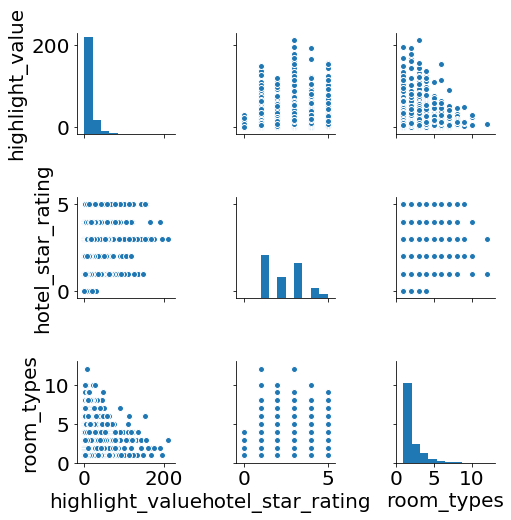

In [478]:
sns.pairplot(response_new)

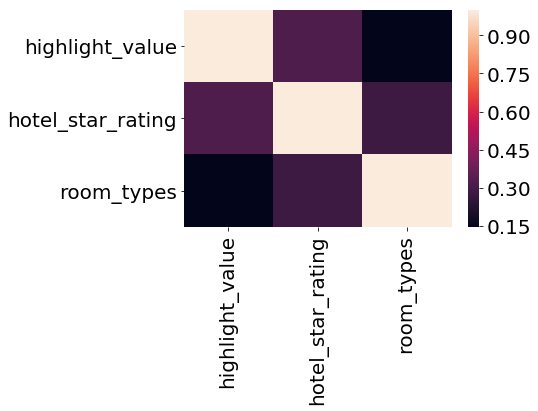

In [479]:
sns.heatmap(cor,xticklabels=cor.columns, yticklabels = cor.columns)

In [485]:
response_new['area'] = response_new['area'].cat.codes
response_new['city'] = response_new['city'].cat.codes
response_new['hotel_overview'] = response_new['hotel_overview'].cat.codes
response_new['is_value_plus'] = response_new['is_value_plus'].cat.codes
response_new['property_type'] = response_new['property_type'].cat.codes

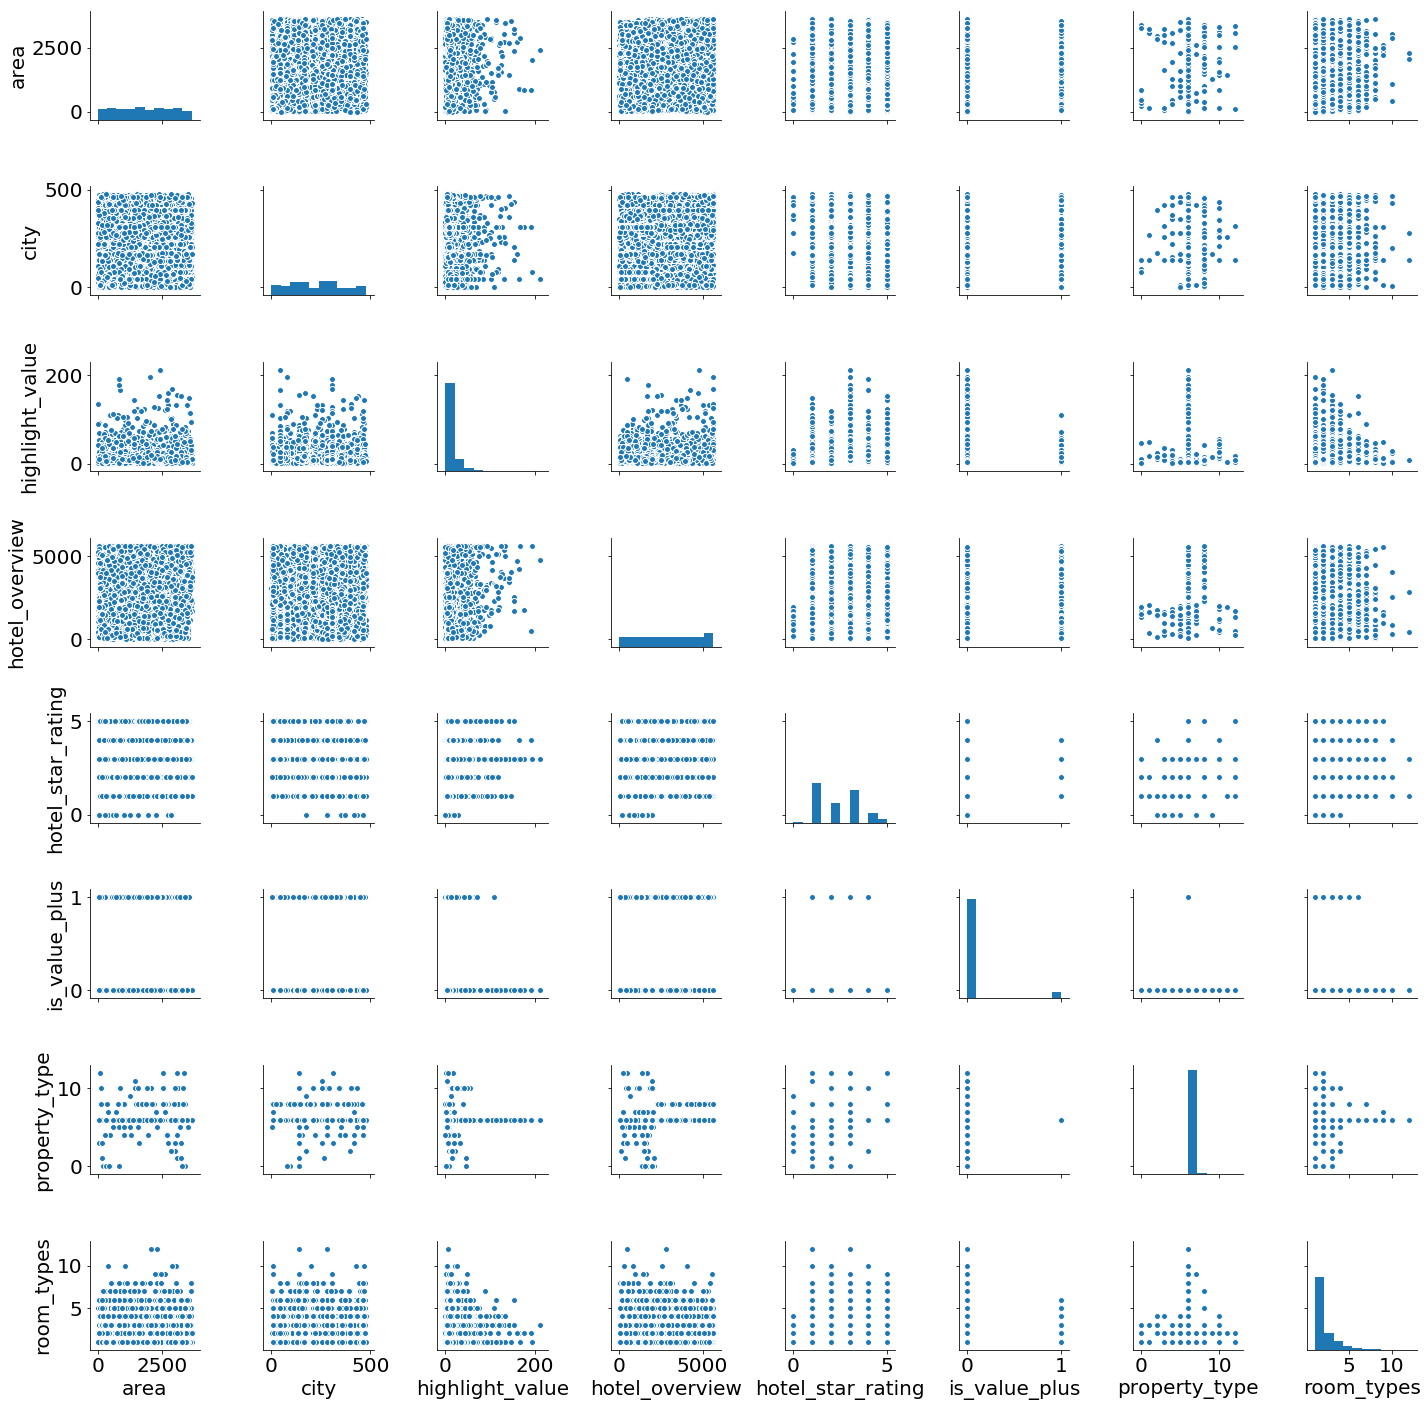

In [486]:
sns.pairplot(response_new)

In [488]:
cor = response_new.corr()

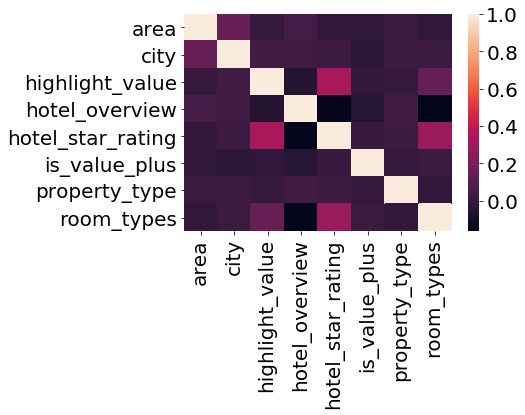

In [489]:
sns.heatmap(cor,xticklabels=cor.columns, yticklabels = cor.columns)

In [491]:
response_new.head()

,area,city,highlight_value,hotel_overview,hotel_star_rating,is_value_plus,property_address,property_id,property_name,property_type,room_types
3,716,446,13,5116,1,0,"Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok",2.01407E+17,SNP House Airport Hotel And Restaurant,6,1
26,452,173,7,896,1,0,C.V.Singh Colony Opp Collector Office,2.01111E+17,Hotel Suman Palace,6,1
28,1787,256,3,1503,2,0,"Adarsh Market, The Mall Manali",2.01512E+17,New Adarsh Annexe,6,1
30,460,173,12,547,2,0,"CVS Colony, jaisalmer CVS Colony",2.0121E+17,Hotel Ajanta Haveli,6,2
35,1281,177,25,77,4,0,"NH A1, Vijaypur",2.01305E+17,Hotel 17 Miles,6,1


In [492]:
response_new = response_new[['area','city','highlight_value','hotel_overview','hotel_star_rating','is_value_plus','property_type','room_types']]


In [493]:
response_new.head()

,area,city,highlight_value,hotel_overview,hotel_star_rating,is_value_plus,property_type,room_types
3,716,446,13,5116,1,0,6,1
26,452,173,7,896,1,0,6,1
28,1787,256,3,1503,2,0,6,1
30,460,173,12,547,2,0,6,2
35,1281,177,25,77,4,0,6,1


In [495]:
response_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5864 entries, 3 to 20057
Data columns (total 8 columns):
area                 5864 non-null int16
city                 5864 non-null int16
highlight_value      5864 non-null int32
hotel_overview       5864 non-null int16
hotel_star_rating    5864 non-null int32
is_value_plus        5864 non-null int8
property_type        5864 non-null int8
room_types           5864 non-null int32
dtypes: int16(3), int32(3), int8(2)
memory usage: 320.3 KB


In [501]:
array = response_new.values
X = array[:,0:8]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [502]:
seed = 10
scoring = 'accuracy'

In [504]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.748883 (0.014672)
LDA: 0.449154 (0.028452)
KNN: 0.368795 (0.018156)
CART: 1.000000 (0.000000)
NB: 0.999787 (0.000640)
SVM: 0.383288 (0.024396)


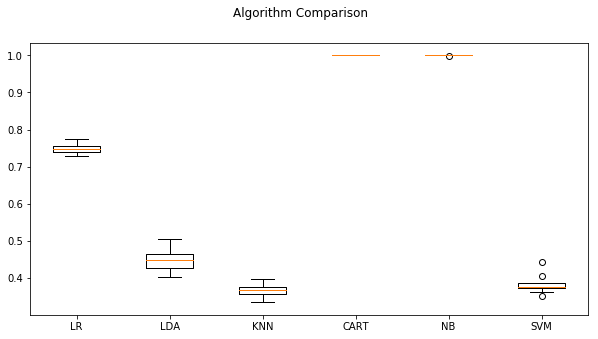

In [505]:
# Compare Algorithms
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [506]:
# Make predictions on validation dataset
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print("accuracy_score")
print(accuracy_score(Y_validation, predictions))
print("confusion_matrix")
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

accuracy_score
0.7476555839727195
confusion_matrix
[[  0   5   0   0   0   0]
 [  0 422   0   0   0   0]
 [  0   0  57 178   0   0]
 [  0   0   1 368   0   1]
 [  0   0   0  98   0   0]
 [  0   0   0  12   1  30]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         5
          1       0.99      1.00      0.99       422
          2       0.98      0.24      0.39       235
          3       0.56      0.99      0.72       370
          4       0.00      0.00      0.00        98
          5       0.97      0.70      0.81        43

avg / total       0.76      0.75      0.69      1173



In [507]:
# Make predictions on validation dataset
lr = GaussianNB()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print("accuracy_score")
print(accuracy_score(Y_validation, predictions))
print("confusion_matrix")
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

accuracy_score
0.9991474850809889
confusion_matrix
[[  5   0   0   0   0   0]
 [  0 422   0   0   0   0]
 [  0   0 235   0   0   0]
 [  0   0   0 370   0   0]
 [  0   0   0   0  98   0]
 [  0   0   0   0   1  42]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         5
          1       1.00      1.00      1.00       422
          2       1.00      1.00      1.00       235
          3       1.00      1.00      1.00       370
          4       0.99      1.00      0.99        98
          5       1.00      0.98      0.99        43

avg / total       1.00      1.00      1.00      1173

